### Importing Libraries & Data

In [1]:
import numpy as np
import pandas as pd
import sqlite3 as sql
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [3]:
path = "Dataset"  
dataset = path + '/mental_health.sqlite'
con = sql.connect(dataset)

### DATA VALIDATION

In [4]:
query = """
    SELECT * FROM Survey;
"""

df = pd.read_sql(query, con)
df

,SurveyID,Description
0,2014,mental health survey for 2014
1,2016,mental health survey for 2016
2,2017,mental health survey for 2017
3,2018,mental health survey for 2018
4,2019,mental health survey for 2019


In [5]:
query = """
    SELECT * FROM Answer order by questionid;
"""

df = pd.read_sql(query, con)
df

,AnswerText,SurveyID,UserID,QuestionID
0,37,2014,1,1
1,44,2014,2,1
2,32,2014,3,1
3,31,2014,4,1
4,31,2014,5,1
...,...,...,...,...
236893,Sometimes,2016,2689,118
236894,Sometimes,2016,2690,118
236895,Sometimes,2016,2691,118
236896,Sometimes,2016,2692,118


In [6]:
query = """
    SELECT * FROM Question;
"""

df = pd.read_sql(query, con)
df

,questiontext,questionid
0,What is your age?,1
1,What is your gender?,2
2,What country do you live in?,3
3,"If you live in the United States, which state or territory do you live in?",4
4,Are you self-employed?,5
5,Do you have a family history of mental illness?,6
6,Have you ever sought treatment for a mental health disorder from a mental health professional?,7
7,How many employees does your company or organization have?,8
8,Is your employer primarily a tech company/organization?,9
9,Does your employer provide mental health benefits as part of healthcare coverage?,10


In [7]:
query = """
    WITH CTE AS (
    SELECT questiontext, questionid,
    lag (questionid,1) OVER (ORDER BY questionid) AS PrevQuestion
    FROM Question
    )
    SELECT * FROM CTE 
    WHERE questionid-PrevQuestion !=1;
"""

df = pd.read_sql(query, con)
df

,questiontext,questionid,PrevQuestion
0,"If you have a mental health disorder, how often do you feel that it interferes with your work when being treated effectively?",48,34


In [8]:
query = """
    SELECT DISTINCT questiontext FROM Question;
"""

df = pd.read_sql(query, con)
df

,questiontext
0,What is your age?
1,What is your gender?
2,What country do you live in?
3,"If you live in the United States, which state or territory do you live in?"
4,Are you self-employed?
5,Do you have a family history of mental illness?
6,Have you ever sought treatment for a mental health disorder from a mental health professional?
7,How many employees does your company or organization have?
8,Is your employer primarily a tech company/organization?
9,Does your employer provide mental health benefits as part of healthcare coverage?


In [9]:
query = """
    SELECT SurveyID FROM Survey 
    WHERE SurveyID IN (SELECT DISTINCT SurveyID FROM Answer);
"""

df = pd.read_sql(query, con)
df

,SurveyID
0,2014
1,2016
2,2017
3,2018
4,2019


In [10]:
query = """
    SELECT questionid FROM Question
    WHERE questionid IN (SELECT DISTINCT questionid FROM Answer);
"""

df = pd.read_sql(query, con)
df

,questionid
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [11]:
query = """
    SELECT count(DISTINCT UserID), min(DISTINCT UserID), MAX(DISTINCT UserID)
    FROM Answer;
"""

df = pd.read_sql(query, con)
df

,count(DISTINCT UserID),min(DISTINCT UserID),MAX(DISTINCT UserID)
0,4218,1,4218


In [12]:
query = """
    WITH CTE AS (
    SELECT A.*, Q.questiontext,
    row_number() OVER(PARTITION BY A.questionid) AS RN
    FROM Answer A
    LEFT JOIN Question Q ON A.questionid = Q.questionid
    )
    SELECT * FROM CTE WHERE RN<=10 OR RN>=4210;
"""

df = pd.read_sql(query, con)
df

,AnswerText,SurveyID,UserID,QuestionID,questiontext,RN
0,37,2014,1,1,What is your age?,1
1,44,2014,2,1,What is your age?,2
2,32,2014,3,1,What is your age?,3
3,31,2014,4,1,What is your age?,4
4,31,2014,5,1,What is your age?,5
5,33,2014,6,1,What is your age?,6
6,35,2014,7,1,What is your age?,7
7,39,2014,8,1,What is your age?,8
8,42,2014,9,1,What is your age?,9
9,23,2014,10,1,What is your age?,10


In [13]:
query = """
    SELECT questionid, count(DISTINCT AnswerText) AS UniqueAnswers
    FROM Answer
    GROUP BY questionid
    ORDER BY UniqueAnswers DESC;
"""

df = pd.read_sql(query, con)
df

,QuestionID,UniqueAnswers
0,86,1020
1,63,457
2,61,449
3,59,353
4,82,337
5,73,306
6,87,287
7,75,269
8,71,229
9,103,160


In [14]:
query = """
    SELECT DISTINCT AnswerText FROM Answer 
    WHERE questionid IN (117);
"""

df = pd.read_sql(query, con)
df

,AnswerText
0,Back-end Developer
1,Front-end Developer
2,Supervisor/Team Lead
3,Executive Leadership
4,Dev Evangelist/Advocate
5,DevOps/SysAdmin
6,Support
7,Designer
8,One-person shop
9,Other


In [15]:
query = """
    SELECT * FROM Question 
    WHERE questionid IN (117);
"""

df = pd.read_sql(query, con)
df

,questiontext,questionid
0,Which of the following best describes your work position?,117


In [16]:
query = """
    WITH CTE AS (
    SELECT questionid, count(*) AS TotalIDs, count(DISTINCT UserID) AS UniqueIDs, count(DISTINCT AnswerText) AS UniqueAnswers
    FROM Answer
    GROUP BY questionid
    ORDER BY UniqueAnswers DESC, questionid
    )
    SELECT *,
    CASE 
    	WHEN UniqueAnswers > 12 THEN "DESCRIBE"
    	WHEN TotalIDs - UniqueIDs = 0 THEN "SINGLE"
    	WHEN TotalIDs - UniqueIDs > 0 THEN "MULTIPLE"
    END AS Type
    FROM CTE;
"""

df = pd.read_sql(query, con)
df

,questionid,TotalIDs,UniqueIDs,UniqueAnswers,Type
0,86,1525,1525,1020,DESCRIBE
1,63,1525,1525,457,DESCRIBE
2,61,1525,1525,449,DESCRIBE
3,59,1525,1525,353,DESCRIBE
4,82,1525,1525,337,DESCRIBE
5,73,1525,1525,306,DESCRIBE
6,87,1525,1525,287,DESCRIBE
7,75,1525,1525,269,DESCRIBE
8,71,1525,1525,229,DESCRIBE
9,103,1260,1260,160,DESCRIBE


In [17]:
query = """
    SELECT SurveyID, count(DISTINCT questionid) as AllQuestions FROM Answer
    GROUP BY SurveyID;
"""

df = pd.read_sql(query, con)
df

,SurveyID,AllQuestions
0,2014,26
1,2016,60
2,2017,76
3,2018,76
4,2019,76


In [18]:
query = """
    WITH CTE2014 AS (
    SELECT DISTINCT questionid FROM Answer
    WHERE SurveyID = 2014
    ORDER BY questionid
    ), CTE2016 AS (
    SELECT DISTINCT questionid FROM Answer
    WHERE SurveyID = 2016
    ORDER BY questionid
    ), CTE2017 AS (
    SELECT DISTINCT questionid FROM Answer
    WHERE SurveyID = 2017
    ORDER BY questionid
    ), CTE2018 AS (
    SELECT DISTINCT questionid FROM Answer
    WHERE SurveyID = 2018
    ORDER BY questionid
    ), CTE2019 AS (
    SELECT DISTINCT questionid FROM Answer
    WHERE SurveyID = 2019
    ORDER BY questionid
    )
    SELECT CTE2014.questionid AS "2014",
    CTE2016.questionid AS "2016",
    CTE2017.questionid AS "2017",
    CTE2018.questionid AS "2018",
    CTE2019.questionid AS "2019",
    Question.questionid 
    FROM CTE2014  
    JOIN CTE2016 ON CTE2014.questionid = CTE2016.questionid
    JOIN CTE2017 ON coalesce(CTE2014.questionid,CTE2016.questionid) = CTE2017.questionid
    JOIN CTE2018 ON coalesce(CTE2014.questionid,CTE2016.questionid,CTE2017.questionid) = CTE2018.questionid
    JOIN CTE2019 ON coalesce(CTE2014.questionid,CTE2016.questionid,CTE2017.questionid,CTE2018.questionid) = CTE2019.questionid
    JOIN Question ON coalesce(CTE2014.questionid,CTE2016.questionid,CTE2017.questionid,CTE2018.questionid,CTE2019.questionid) = Question.questionid
    ORDER BY Question.questionid;
"""

df = pd.read_sql(query, con)
df

,2014,2016,2017,2018,2019,questionid
0,1,1,1,1,1,1
1,2,2,2,2,2,2
2,3,3,3,3,3,3
3,4,4,4,4,4,4
4,5,5,5,5,5,5
5,6,6,6,6,6,6
6,7,7,7,7,7,7
7,8,8,8,8,8,8
8,9,9,9,9,9,9
9,10,10,10,10,10,10


In [19]:
query = """
    SELECT * FROM Question WHERE questionid <=12;
"""

df = pd.read_sql(query, con)
df

,questiontext,questionid
0,What is your age?,1
1,What is your gender?,2
2,What country do you live in?,3
3,"If you live in the United States, which state or territory do you live in?",4
4,Are you self-employed?,5
5,Do you have a family history of mental illness?,6
6,Have you ever sought treatment for a mental health disorder from a mental health professional?,7
7,How many employees does your company or organization have?,8
8,Is your employer primarily a tech company/organization?,9
9,Does your employer provide mental health benefits as part of healthcare coverage?,10


### EDA

In [20]:
query = """
    SELECT SurveyID as SurveyYear, count(DISTINCT UserID) as Participants
    FROM Answer
    GROUP BY SurveyYear 
    ORDER BY SurveyYear;
"""

Count_per_survey = pd.read_sql(query, con)
Count_per_survey

,SurveyYear,Participants
0,2014,1260
1,2016,1433
2,2017,756
3,2018,417
4,2019,352


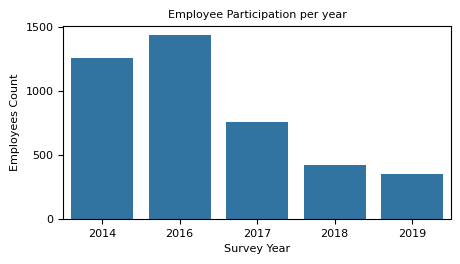

In [21]:
plt.figure(figsize=(5,2.5))
plt.ticklabel_format(style='plain')

#barplot = Count_per_survey.plot.bar(x="SurveyYear", y="Participants", figsize=(6, 3))
#plt.bar(Count_per_survey["SurveyYear"], Count_per_survey["Participants"])
sns.barplot(data=Count_per_survey, x="SurveyYear", y="Participants")

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel('Survey Year', fontsize=8)
plt.ylabel('Employees Count', fontsize=8)
plt.title('Employee Participation per year', fontsize=8)
plt.show()

##### Question 1

In [22]:
query = """
    SELECT AnswerText as Age, count(*) as EmployeeCount
    FROM Answer
    WHERE questionid = 1
    GROUP BY Age 
    ORDER BY length(Age), Age;
"""

Age_count = pd.read_sql(query, con).astype({"Age": int,"EmployeeCount": int})

In [23]:
Age_count = Age_count.sort_values(by = "Age", ascending = True)
Age_count.reset_index(drop=True,inplace=True)
Age_count

,Age,EmployeeCount
0,-29,1
1,-1,5
2,0,1
3,3,1
4,5,1
5,8,1
6,11,1
7,15,1
8,17,1
9,18,9


In [24]:
Age_count.describe()

,Age,EmployeeCount
count,65.000000,65.000000
mean,48.015385,64.892308
std,54.539977,79.612759
min,-29.000000,1.000000
25%,25.000000,3.000000
50%,41.000000,20.000000
75%,57.000000,122.000000
max,329.000000,250.000000


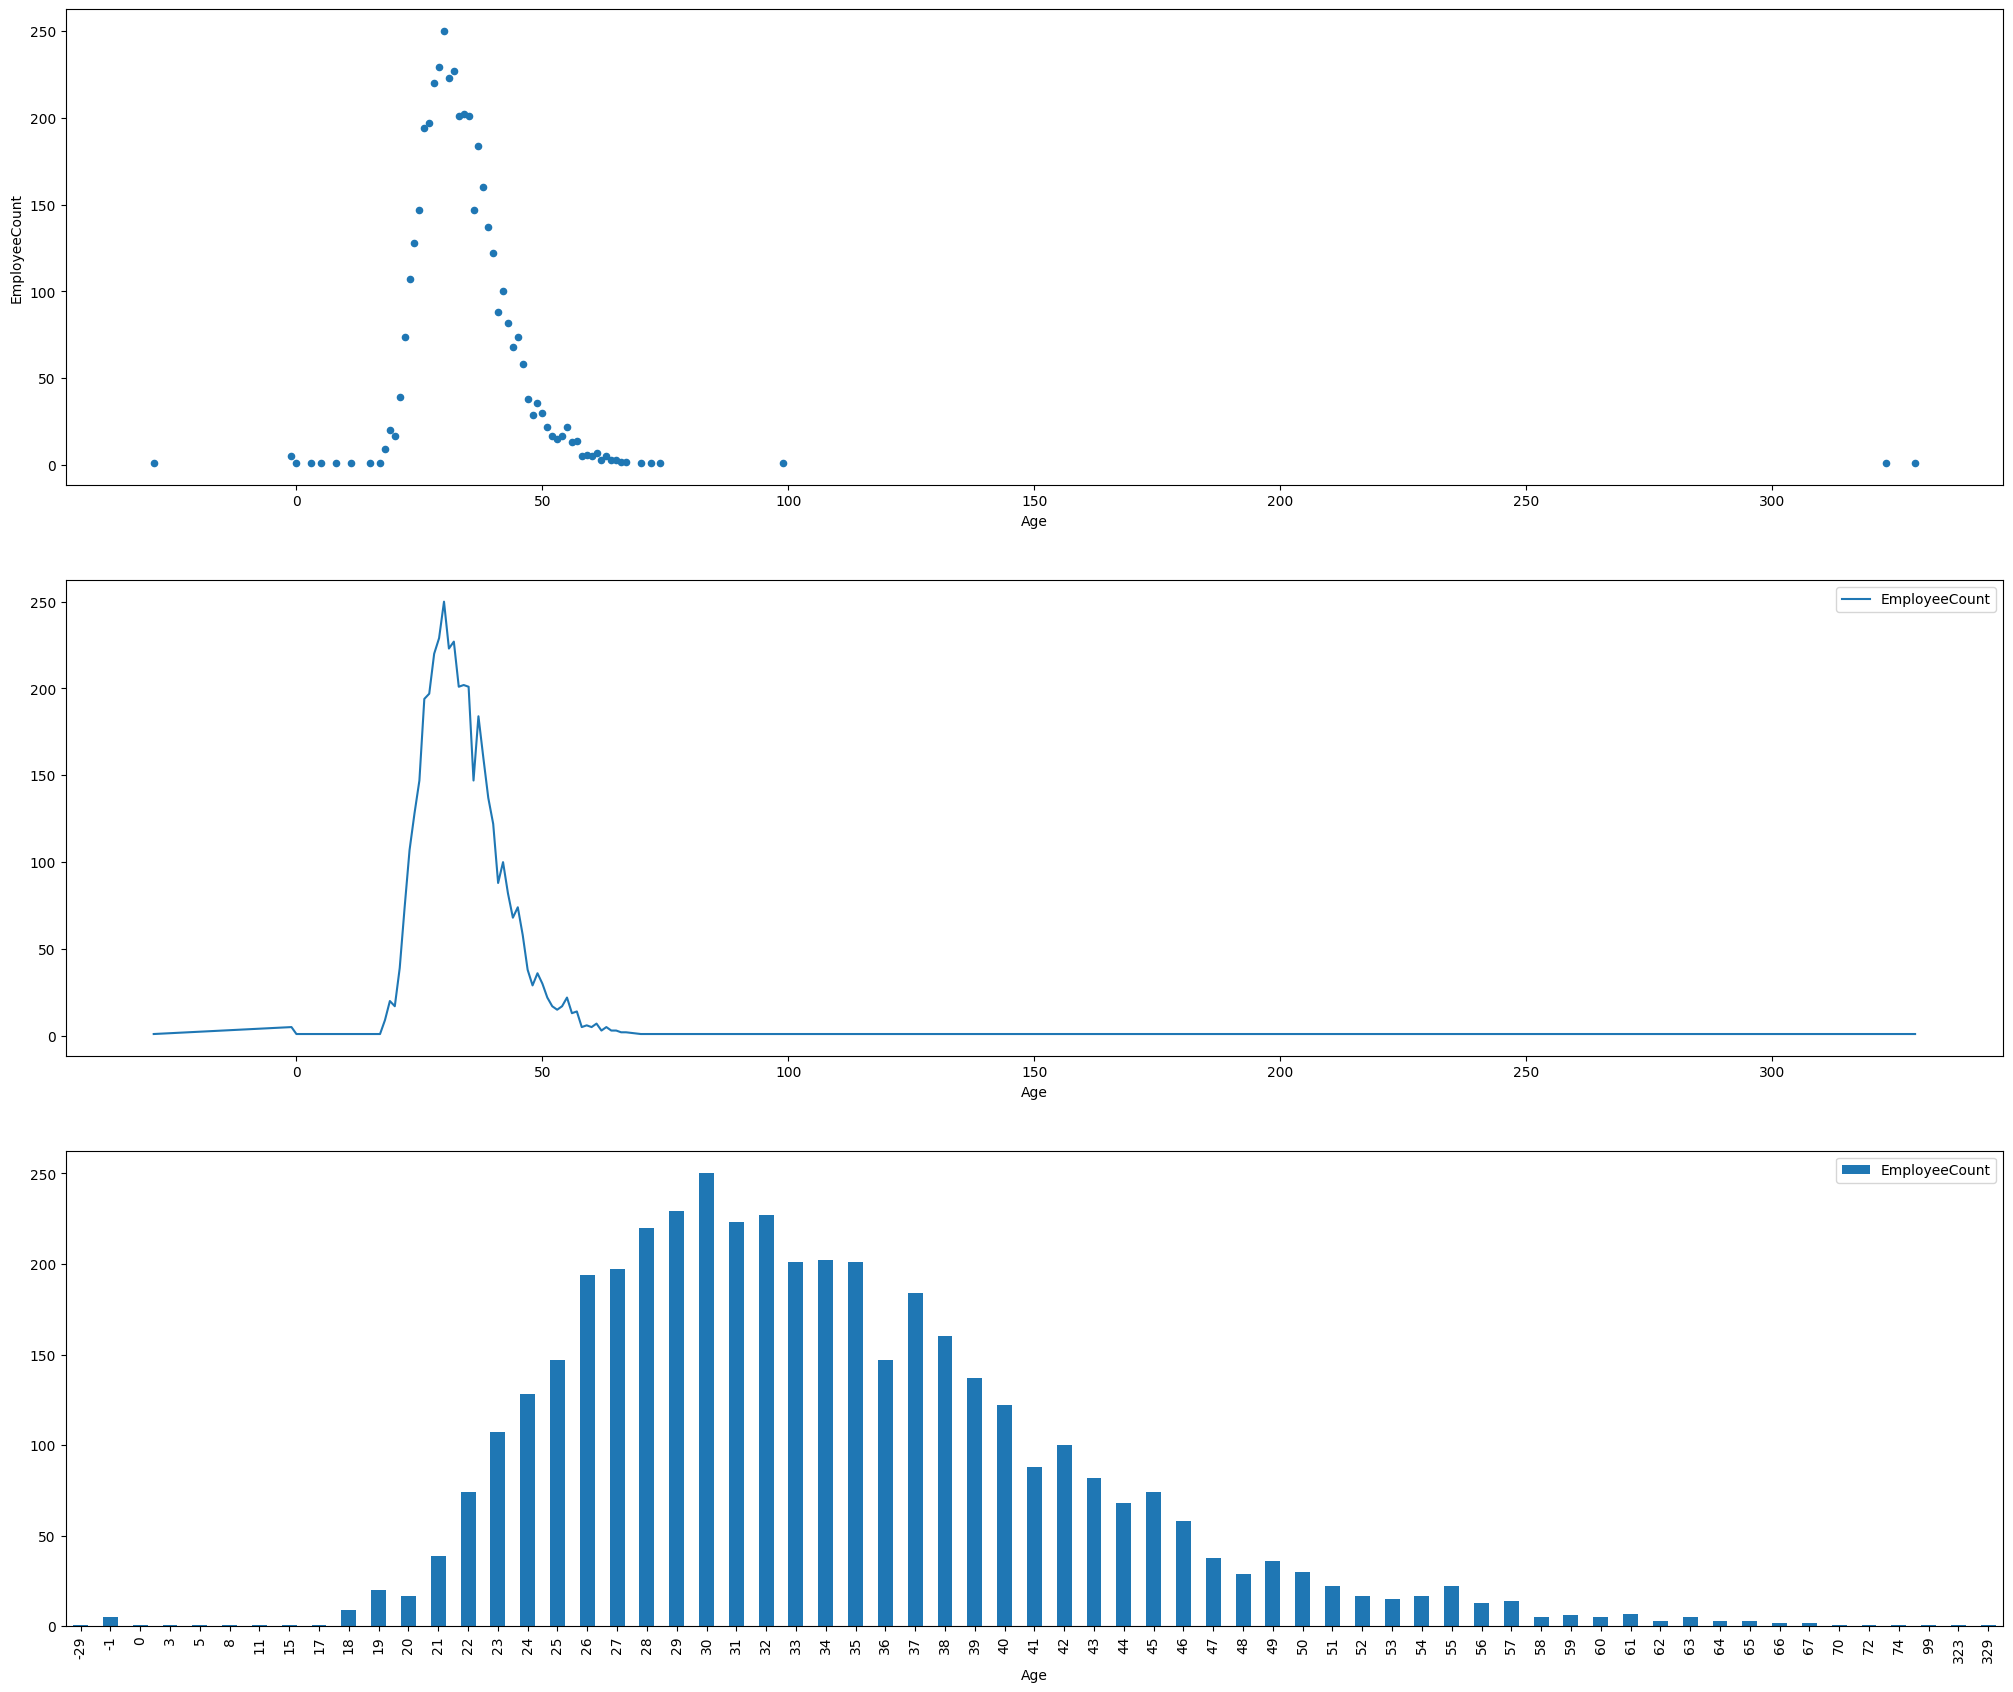

In [25]:
figure, axes = plt.subplots(3, 1, figsize=(25, 21))

Age_count.plot(x="Age", y="EmployeeCount", kind="scatter", ax=axes[0])
Age_count.plot(x="Age", y="EmployeeCount", kind="line", ax=axes[1])
Age_count.plot(x="Age", y="EmployeeCount", kind="bar", ax=axes[2])

plt.show()

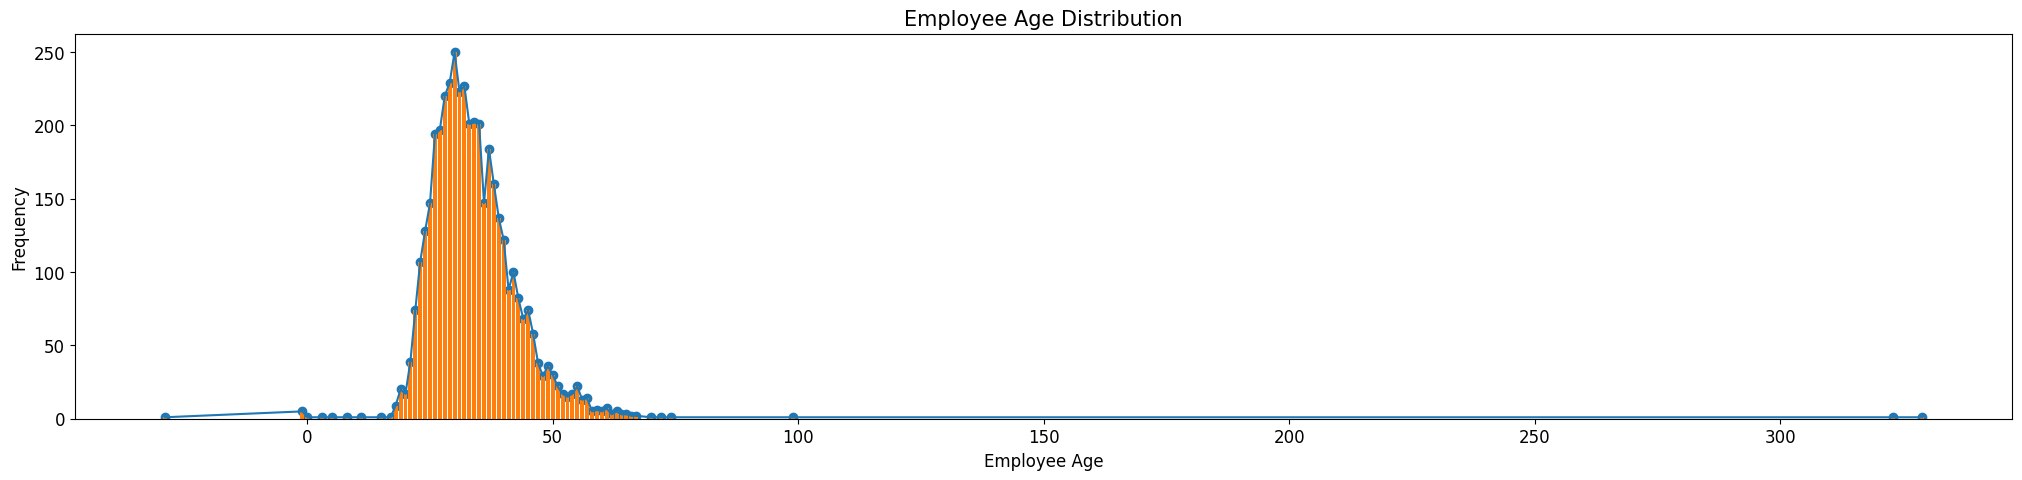

In [27]:
plt.figure(figsize=(25,5))
plt.ticklabel_format(style='plain')

plt.scatter(Age_count["Age"], Age_count["EmployeeCount"])
plt.plot(Age_count["Age"], Age_count["EmployeeCount"])
plt.bar(Age_count["Age"], Age_count["EmployeeCount"])

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Employee Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Employee Age Distribution', fontsize=15)
plt.show()

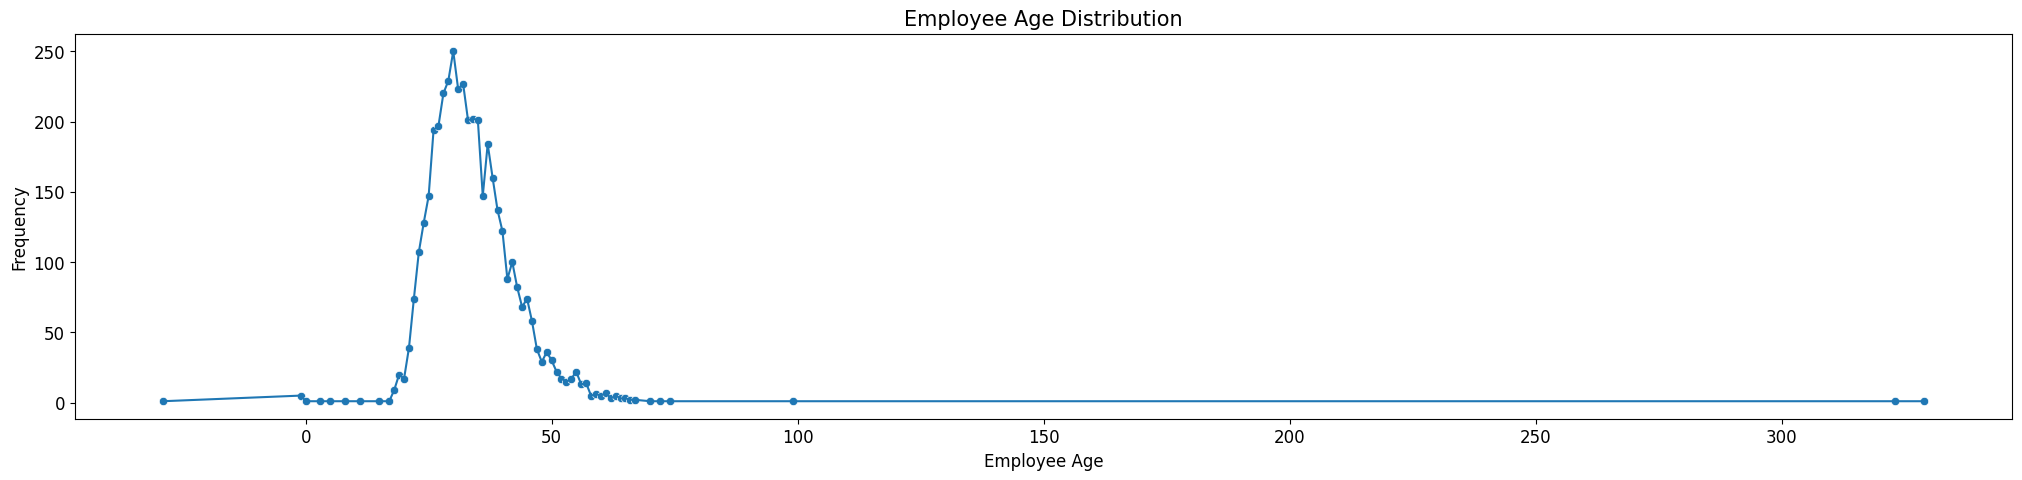

In [28]:
plt.figure(figsize=(25,5))
plt.ticklabel_format(style='plain')

sns.scatterplot(data=Age_count, x="Age", y="EmployeeCount")
sns.lineplot(data=Age_count, x="Age", y="EmployeeCount")

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Employee Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Employee Age Distribution', fontsize=15)
plt.show()

In [29]:
query = """
    SELECT SurveyID, CAST(AnswerText AS INT) AS Age
    FROM Answer WHERE questionid = 1 AND 
    CAST(AnswerText AS INT) <= 18 OR
    CAST(AnswerText AS INT) >= 65
    ORDER BY Age;
"""

Age_outliers = pd.read_sql(query, con)
Age_outliers

,SurveyID,Age
0,2014,-29
1,2014,-1
2,2014,-1
3,2014,-1
4,2017,-1
5,2017,-1
6,2019,0
7,2016,3
8,2014,5
9,2014,8


In [30]:
query = """
    SELECT SurveyID as SurveyYear, 
    CASE
    	WHEN AnswerText BETWEEN 18 AND 25 THEN '18-25'
    	WHEN AnswerText BETWEEN 26 AND 35 THEN '26-35'
    	WHEN AnswerText BETWEEN 36 AND 45 THEN '36-45'
    	WHEN AnswerText BETWEEN 46 AND 55 THEN '46-55'
    	ELSE'Above 55'
    END AS AgeGroup,
    count(*) AS EmployeeCount
    FROM Answer
    WHERE questionid = 1
    AND AnswerText BETWEEN 18 AND 98
    GROUP BY SurveyYear, AgeGroup 
    ORDER BY SurveyYear, AgeGroup;
"""

Age_survey = pd.read_sql(query, con).astype({"SurveyYear": str})
Age_survey

,SurveyYear,AgeGroup,EmployeeCount
0,2014,18-25,217
1,2014,26-35,702
2,2014,36-45,278
3,2014,46-55,43
4,2014,Above 55,15
5,2016,18-25,167
6,2016,26-35,742
7,2016,36-45,395
8,2016,46-55,103
9,2016,Above 55,23


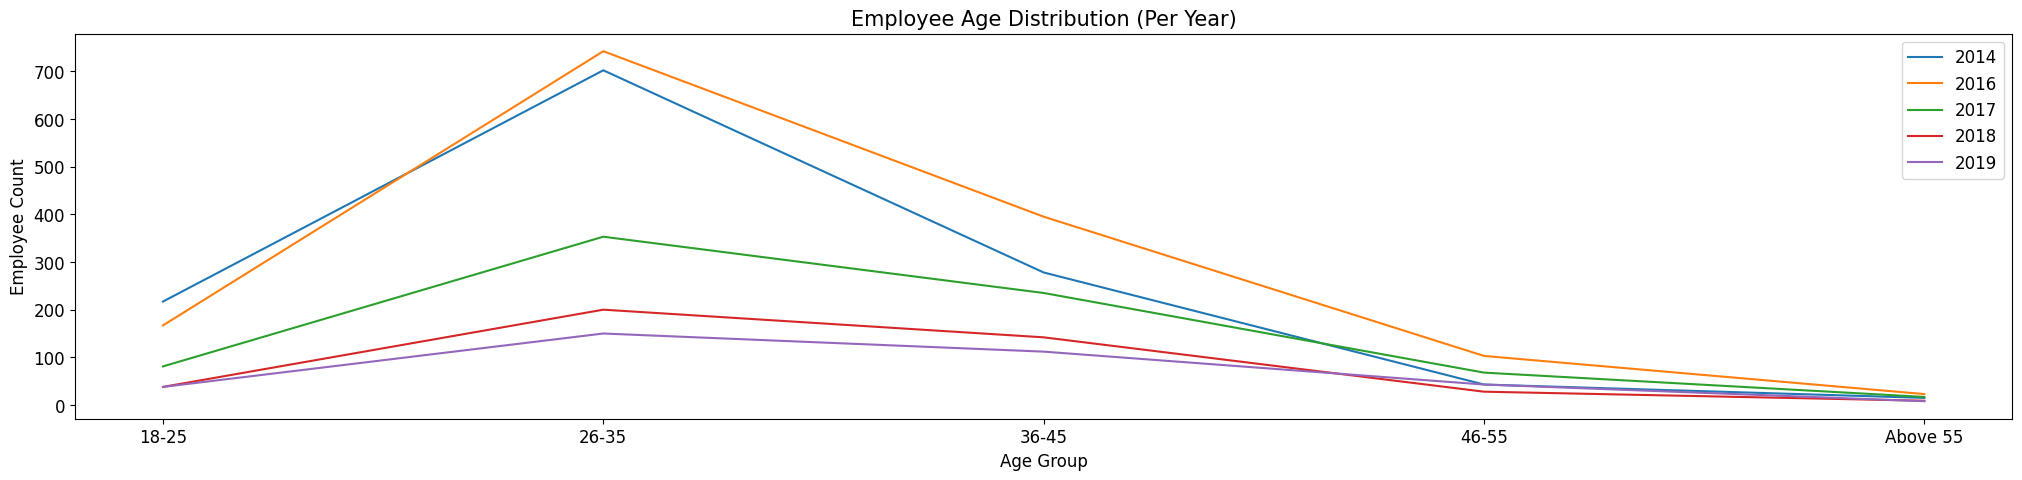

In [31]:
#figure, axes = plt.subplots(2, 1, figsize=(20, 10))
plt.figure(figsize=(25,5))
plt.ticklabel_format(style='plain')

#sns.barplot(data=Age_survey, x="AgeGroup", y="EmployeeCount", hue="SurveyYear")
sns.lineplot(data=Age_survey, x="AgeGroup", y="EmployeeCount", hue="SurveyYear")

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Employee Count', fontsize=12)
plt.title('Employee Age Distribution (Per Year)', fontsize=15)
plt.legend(fontsize=12)
plt.show()

##### Question 2

In [32]:
query = """
    SELECT AnswerText as Gender, count(*) AS EmployeeCount
    FROM Answer 
    WHERE questionid = 2
    GROUP BY Gender
    ORDER BY EmployeeCount DESC;
"""

Gender_count = pd.read_sql(query,con)
Gender_count

,Gender,EmployeeCount
0,Male,2830
1,Female,914
2,male,212
3,female,110
4,-1,24
5,Nonbinary,8
6,non-binary,6
7,Genderqueer,4
8,Agender,4
9,None,3


In [33]:
query = """
    SELECT SurveyID as SurveyYear,
    CASE
    	WHEN AnswerText = "male" or AnswerText = "Male" THEN "Male" 
		WHEN AnswerText = "female" or AnswerText = "Female" THEN "Female" 
        ELSE "Other"
    END AS Gender,
    count(*) AS EmployeeCount
    FROM Answer 
    WHERE questionid = 2
    AND AnswerText NOT NULL
    GROUP BY SurveyYear, Gender
    ORDER BY SurveyYear, Gender;
"""

Gender_survey = pd.read_sql(query,con)
Gender_survey

,SurveyYear,Gender,EmployeeCount
0,2014,Female,247
1,2014,Male,991
2,2014,Other,22
3,2016,Female,336
4,2016,Male,1057
5,2016,Other,40
6,2017,Female,218
7,2017,Male,502
8,2017,Other,36
9,2018,Female,125


In [34]:
Gender_survey.pivot_table(values='EmployeeCount', index = 'SurveyYear', columns= 'Gender', aggfunc= 'sum')

Gender,Female,Male,Other
SurveyYear,,,
2014,247,991,22
2016,336,1057,40
2017,218,502,36
2018,125,265,27
2019,98,227,27


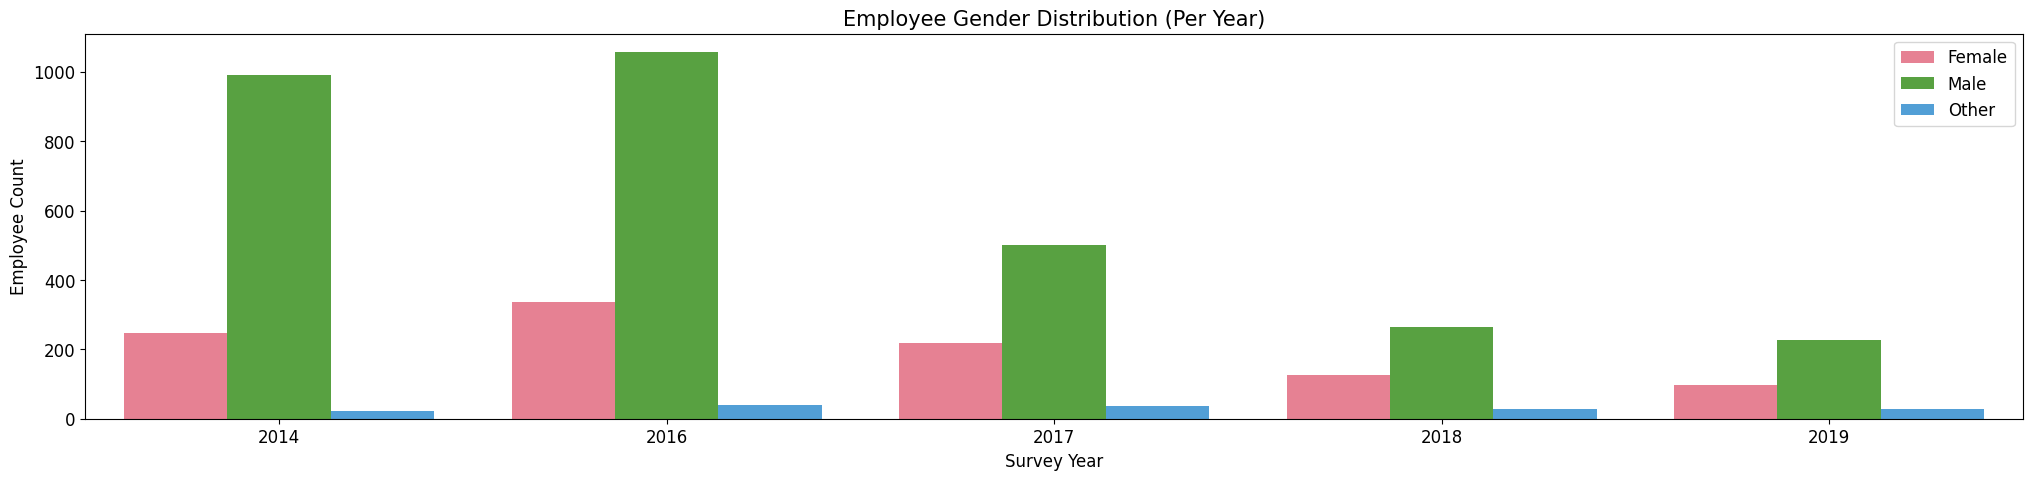

In [35]:
plt.figure(figsize=(25,5))
plt.ticklabel_format(style='plain')

sns.barplot(data = Gender_survey, x="SurveyYear", y="EmployeeCount", hue="Gender", palette="husl")

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Survey Year', fontsize=12)
plt.ylabel('Employee Count', fontsize=12)
plt.title('Employee Gender Distribution (Per Year)', fontsize=15)
plt.legend(fontsize=12)
plt.show()

##### Question 3

In [36]:
query = """
    SELECT AnswerText AS CountryName, count(*) AS EmployeeCount 
    FROM Answer 
    WHERE questionid = 3 AND AnswerText != -1
    GROUP BY CountryName
    ORDER BY EmployeeCount desc
    LIMIT 20;
"""
Country = pd.read_sql(query, con)
Country

,CountryName,EmployeeCount
0,United States of America,1853
1,United States,751
2,United Kingdom,482
3,Canada,199
4,Germany,136
5,Netherlands,98
6,Australia,73
7,Ireland,51
8,France,51
9,India,50


In [37]:
# Country = Country[Country['CountryName']!='-1']
# top10 = Country.head(10)['State'].to_list()
# Country['CountryName'] = np.where(Country['CountryName'].isin(top10), Country['CountryName'], 'Other')

In [38]:
Country['CountryName'] = np.where(Country['CountryName'].str.contains("States"), 'USA', Country['CountryName'])
Country['CountryName'] = np.where(Country['CountryName']=="United Kingdom", 'UK', Country['CountryName'])

Country = Country.groupby('CountryName')['EmployeeCount'].sum().reset_index().sort_values(by='EmployeeCount',ascending=False).reset_index(drop=True)
Country

,CountryName,EmployeeCount
0,USA,2604
1,UK,482
2,Canada,199
3,Germany,136
4,Netherlands,98
5,Australia,73
6,France,51
7,Ireland,51
8,India,50
9,Brazil,37


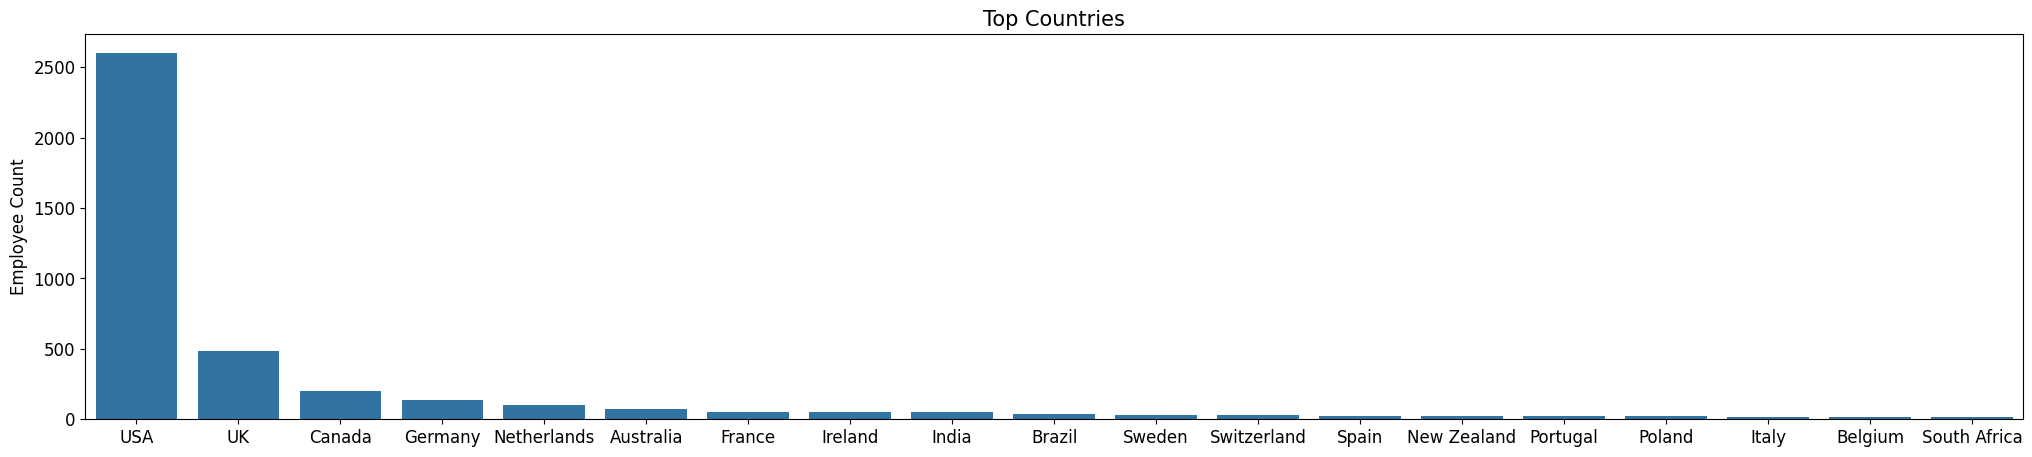

In [39]:
plt.figure(figsize=(25,5))
plt.ticklabel_format(style='plain')

sns.barplot(data=Country, x="CountryName", y="EmployeeCount")

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('')
plt.ylabel('Employee Count', fontsize=12)
plt.title('Top Countries', fontsize=15)
plt.show()

##### Question 4

In [40]:
query = """
    SELECT AnswerText AS State, count(*) AS EmployeeCount 
    FROM Answer 
    WHERE questionid = 4 AND AnswerText != -1
    GROUP BY State
    ORDER BY EmployeeCount DESC
;
"""
State = pd.read_sql(query, con)
State

,State,EmployeeCount
0,California,382
1,Illinois,223
2,Washington,168
3,New York,146
4,Tennessee,121
5,Texas,119
6,Ohio,109
7,Michigan,108
8,Minnesota,101
9,Oregon,99


In [41]:
# State = State[State['State']!='-1']
# top10 = State.head(10)['State'].to_list()
# State['State'] = np.where(State['State'].isin(top10), State['State'], 'Other')

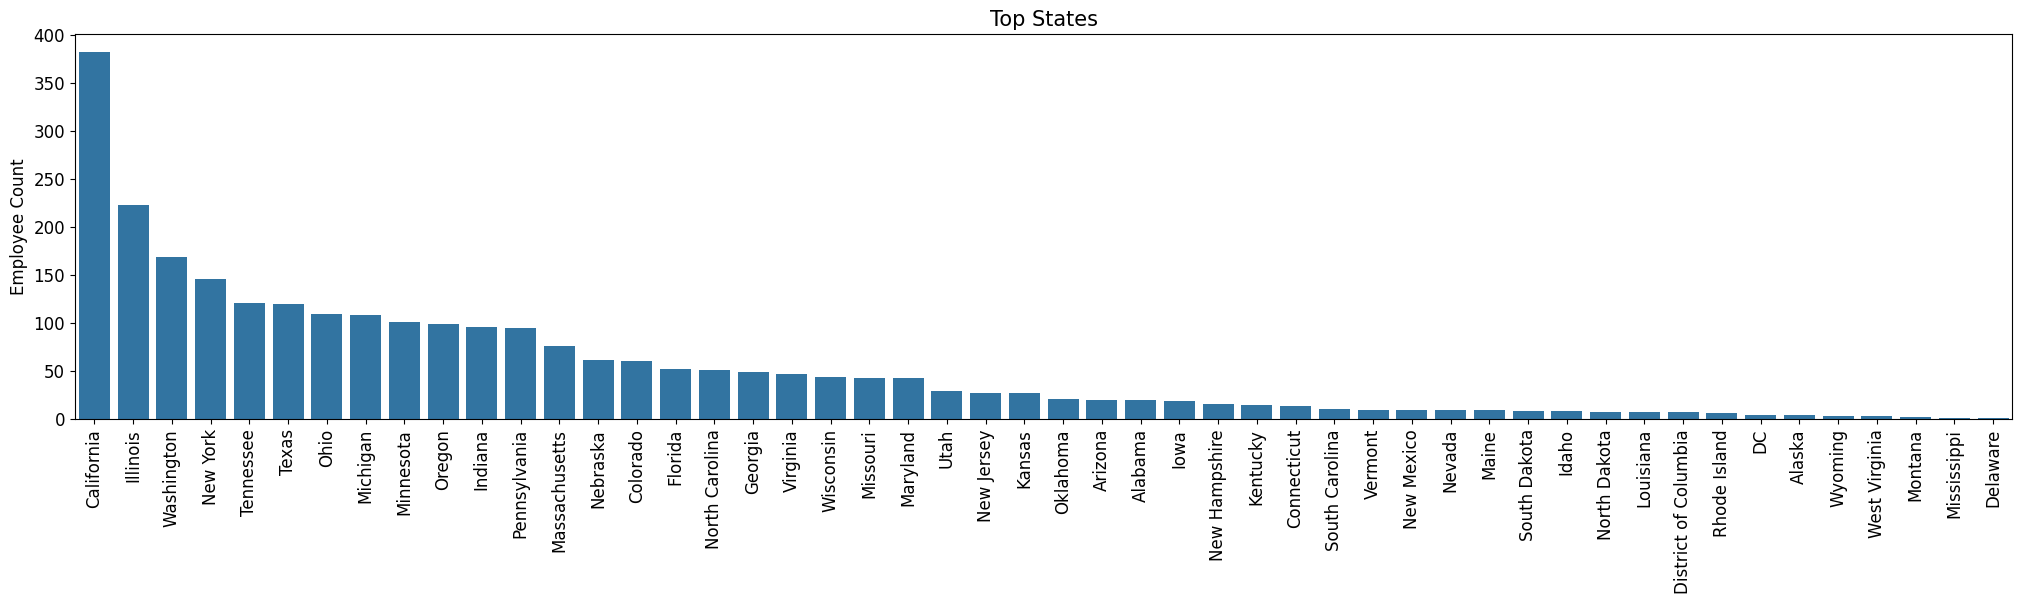

In [42]:
plt.figure(figsize=(25,5))
plt.ticklabel_format(style='plain')

sns.barplot(data=State, x="State", y="EmployeeCount")

plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('')
plt.ylabel('Employee Count', fontsize=12)
plt.title('Top States', fontsize=15)
plt.show()

##### Question 5

In [43]:
query = """
    SELECT SurveyID as SurveyYear,
    CASE
    	WHEN AnswerText = 1 THEN "Yes" 
        ELSE "No"
    END AS SelfEmployed,
    count(*) AS EmployeeCount 
    FROM Answer 
    WHERE questionid = 5 AND AnswerText != -1
    GROUP BY SurveyYear, SelfEmployed
    ORDER BY SurveyYear, SelfEmployed;
"""
Self_employed = pd.read_sql(query, con)
Self_employed

,SurveyYear,SelfEmployed,EmployeeCount
0,2014,No,1096
1,2014,Yes,146
2,2016,No,1146
3,2016,Yes,287
4,2017,No,643
5,2017,Yes,113
6,2018,No,361
7,2018,Yes,56
8,2019,No,304
9,2019,Yes,48


In [44]:
Self_employed.pivot_table(values='EmployeeCount', index = 'SurveyYear', columns= 'SelfEmployed', aggfunc= 'sum')

SelfEmployed,No,Yes
SurveyYear,,
2014,1096,146
2016,1146,287
2017,643,113
2018,361,56
2019,304,48


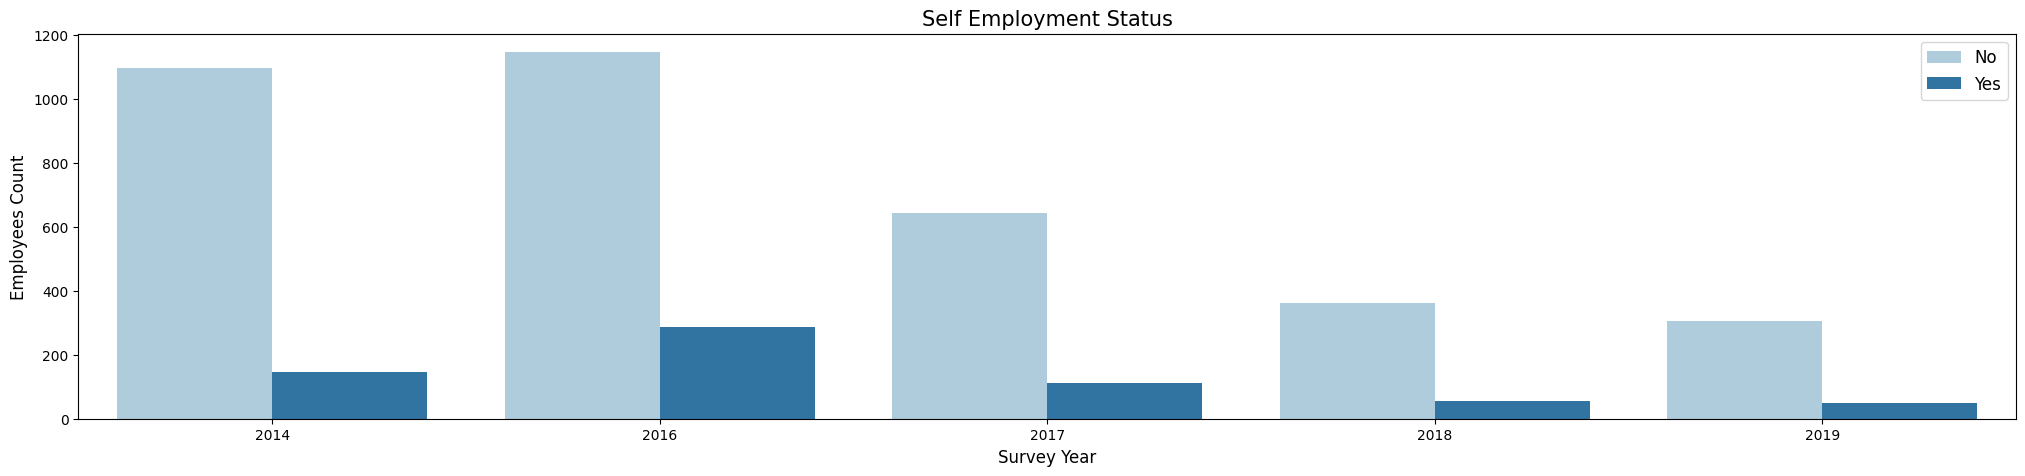

In [45]:
plt.figure(figsize=(25,5))
plt.ticklabel_format(style='plain')

sns.barplot(data = Self_employed, x="SurveyYear", y="EmployeeCount", hue = "SelfEmployed", palette="Paired")

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Survey Year', fontsize=12)
plt.ylabel('Employees Count', fontsize=12)
plt.title('Self Employment Status', fontsize=15)
plt.legend(fontsize=12)
plt.show()

##### Question 6

In [46]:
query = """
    SELECT 
    CASE 
        WHEN AnswerText = "I don't know" THEN "Not Aware"
        ELSE AnswerText
    END as FamilyHistory, 
    count(*) as Count, 
    100.0* count(*)/ sum(count(*)) OVER() as Percentage 
    FROM Answer 
    WHERE questionid = 6
    GROUP BY FamilyHistory
    ORDER BY Count;
"""
Family_history = pd.read_sql(query, con)
Family_history

,FamilyHistory,Count,Percentage
0,Not Aware,649,15.386439
1,No,1701,40.327169
2,Yes,1868,44.286392


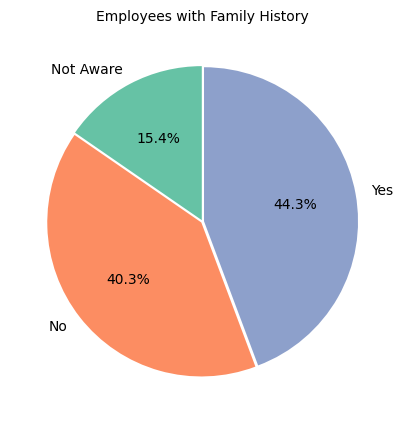

In [47]:
explode = [0.01] * len(Family_history)

plt.figure(figsize=(10, 5))
plt.pie(
    Family_history["Percentage"],
    labels=Family_history["FamilyHistory"],
    explode=explode,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("Set2")
)
plt.title("Employees with Family History", fontsize=10)
plt.show()

##### Question 7

In [48]:
query = """
    SELECT Year, FamilyHistory, 
    COUNT(Treatment) AS EmployeeCount,
    SUM(Treatment) AS InTreatment,
    ROUND(100.0* SUM(Treatment)/ COUNT(Treatment), 2) AS Perc
    FROM (
        SELECT SurveyID AS Year,
            MAX(CASE WHEN (questionid = 6 AND AnswerText ="I don't know") THEN 'Not Aware' ELSE AnswerText END) AS FamilyHistory,
            MAX(CASE WHEN (questionid = 7) THEN AnswerText END) AS Treatment
        FROM Answer
        WHERE questionid IN (6,7)
        GROUP BY Year, UserID
    ) as T
    GROUP BY Year, FamilyHistory
"""
Treatment_perc = pd.read_sql(query, con)
Treatment_perc

,Year,FamilyHistory,EmployeeCount,InTreatment,Perc
0,2014,No,768,272,35.42
1,2014,Yes,492,365,74.19
2,2016,No,488,162,33.20
3,2016,Not Aware,275,157,57.09
4,2016,Yes,670,520,77.61
5,2017,No,224,76,33.93
6,2017,Not Aware,193,122,63.21
7,2017,Yes,339,258,76.11
8,2018,No,114,33,28.95
9,2018,Not Aware,95,62,65.26


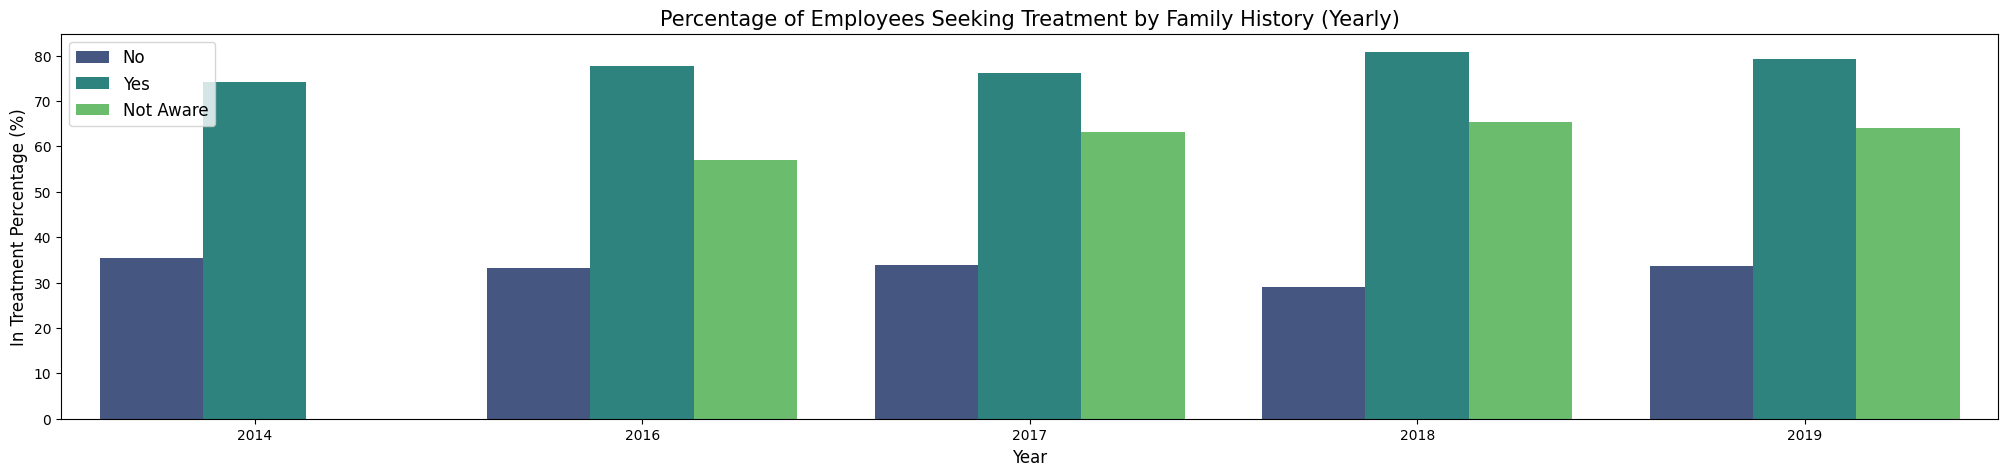

In [49]:
plt.figure(figsize=(25, 5))

sns.barplot(data=Treatment_perc, x="Year", y="Perc", hue="FamilyHistory", palette = "viridis")

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Year", fontsize=12)
plt.ylabel("In Treatment Percentage (%)", fontsize=12)
plt.title("Percentage of Employees Seeking Treatment by Family History (Yearly)", fontsize=15)
plt.legend(loc='upper left', fontsize=12)

plt.show()

In [50]:
query = """
    SELECT SurveyID as SurveyYear, 
    CASE 
        WHEN AnswerText = 1 THEN "Yes"
        ELSE "No"
    END AS Treatment, 
    count(*) AS EmployeeCount 
    FROM Answer 
    WHERE questionid IN (6,7) 
    GROUP BY SurveyYear, Treatment
    ORDER BY SurveyYear, Treatment;
"""
Treatment = pd.read_sql(query, con)
Treatment

,SurveyYear,Treatment,EmployeeCount
0,2014,No,1883
1,2014,Yes,637
2,2016,No,2027
3,2016,Yes,839
4,2017,No,1056
5,2017,Yes,456
6,2018,No,571
7,2018,Yes,263
8,2019,No,487
9,2019,Yes,217


In [51]:
Treatment.pivot_table(values='EmployeeCount', index = 'SurveyYear', columns= 'Treatment', aggfunc= 'sum')

Treatment,No,Yes
SurveyYear,,
2014,1883,637
2016,2027,839
2017,1056,456
2018,571,263
2019,487,217


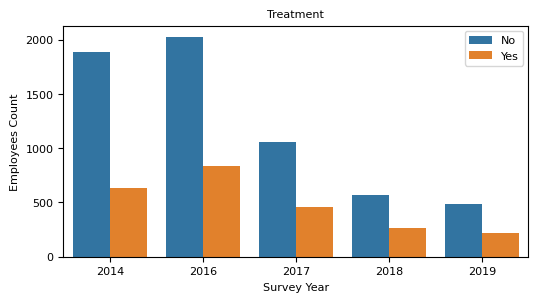

In [52]:
plt.figure(figsize=(6,3))
plt.ticklabel_format(style='plain')

sns.barplot(data = Treatment, x="SurveyYear", y="EmployeeCount", hue = "Treatment")

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel('Survey Year', fontsize=8)
plt.ylabel('Employees Count', fontsize=8)
plt.title('Treatment', fontsize=8)
plt.legend(fontsize=8)
plt.show()

In [53]:
%whos DataFrame

Variable           Type         Data/Info
-----------------------------------------
Age_count          DataFrame        Age  EmployeeCount\n0<...>1\n64  329              1
Age_outliers       DataFrame          SurveyID  Age\n0   <...> 500\n1095      2019  500
Age_survey         DataFrame       SurveyYear  AgeGroup  <...>  Above 55              8
Count_per_survey   DataFrame       SurveyYear  Participan<...>       2019           352
Country            DataFrame         CountryName  Employe<...>uth Africa             16
Family_history     DataFrame      FamilyHistory  Count  P<...>   Yes   1868   44.286392
Gender_count       DataFrame                             <...>        43              1
Gender_survey      DataFrame        SurveyYear  Gender  E<...>19   Other             27
Self_employed      DataFrame       SurveyYear SelfEmploye<...>       Yes             48
State              DataFrame                       State <...>  Delaware              1
Treatment          DataFrame       S